In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_excel("Height-Width.xlsx")

In [ ]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [ ]:
df.tail()

,Height,Weight
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671
3500,72.738970,187.222909


In [ ]:
df.describe()

,Height,Weight
count,3501.000000,3501.000000
mean,69.024411,186.891258
std,2.858583,19.903132
min,59.380650,65.780000
25%,67.193523,173.896237
50%,69.044211,187.308370
75%,70.976491,200.356448
max,78.998742,269.989698


In [ ]:
x = df[['Height']]

In [ ]:
x.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [ ]:
y = df['Weight']
y.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split as tts

In [ ]:
xtrain,xtest,ytrain,ytest = tts(x,y,test_size=0.3,random_state=5)

In [ ]:
xtrain.head()

,Height
3466,67.172828
828,66.653234
2234,65.077902
3245,65.035786
1298,69.702258


In [ ]:
xtest.head()

,Height
2730,63.914541
2008,66.416414
840,69.016067
2635,71.948486
1721,71.196587


In [ ]:
ytrain.head()

3466    181.886241
828     160.147436
2234    165.313807
3245    168.618676
1298    177.149091
Name: Weight, dtype: float64

In [ ]:
ytest.head()

2730    167.842391
2008    193.601091
840     196.763907
2635    208.204435
1721    191.683842
Name: Weight, dtype: float64

Linear REgression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression()

In [ ]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
m = reg.coef_ #y= mx + c 

In [ ]:
m 

array([6.00809929])

In [ ]:
c = reg.intercept_
c

-227.77595602223434

In [ ]:
y = m*3000 + c
y

array([17796.52189924])

In [ ]:
reg.predict([[2100]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([12389.23254266])

In [ ]:
reg.predict(xtest)

array([156.22895255, 171.26045447, 186.87942774, ..., 205.60020285,
       186.14253731, 219.24585226])

In [ ]:
pred = reg.predict(xtest)
pred

array([156.22895255, 171.26045447, 186.87942774, ..., 205.60020285,
       186.14253731, 219.24585226])

In [ ]:
df["Predicted Result"] = reg.predict(x)

In [ ]:
df.head()

,Height,Weight,Predicted Result
0,73.847017,241.893563,215.904254
1,68.781904,162.310473,185.472553
2,74.110105,212.740856,217.484915
3,71.730978,220.042470,203.190884
4,69.881796,206.349801,192.080812


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
mse = mean_squared_error(ytest,pred)

In [ ]:
mse

102.60138482843213

In [ ]:
mae = mean_absolute_error(ytest,pred)
mae

8.061150778858023

best fit line

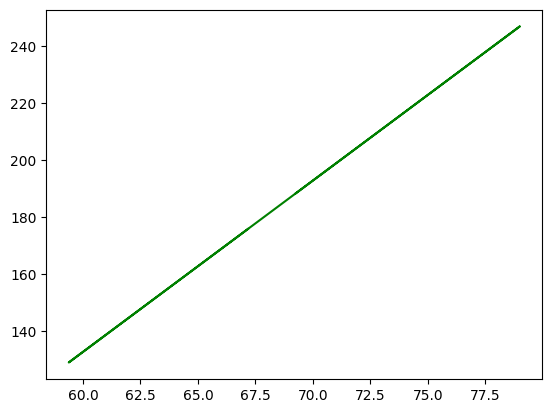

In [ ]:
plt.plot(xtrain,reg.predict(xtrain),color="green")

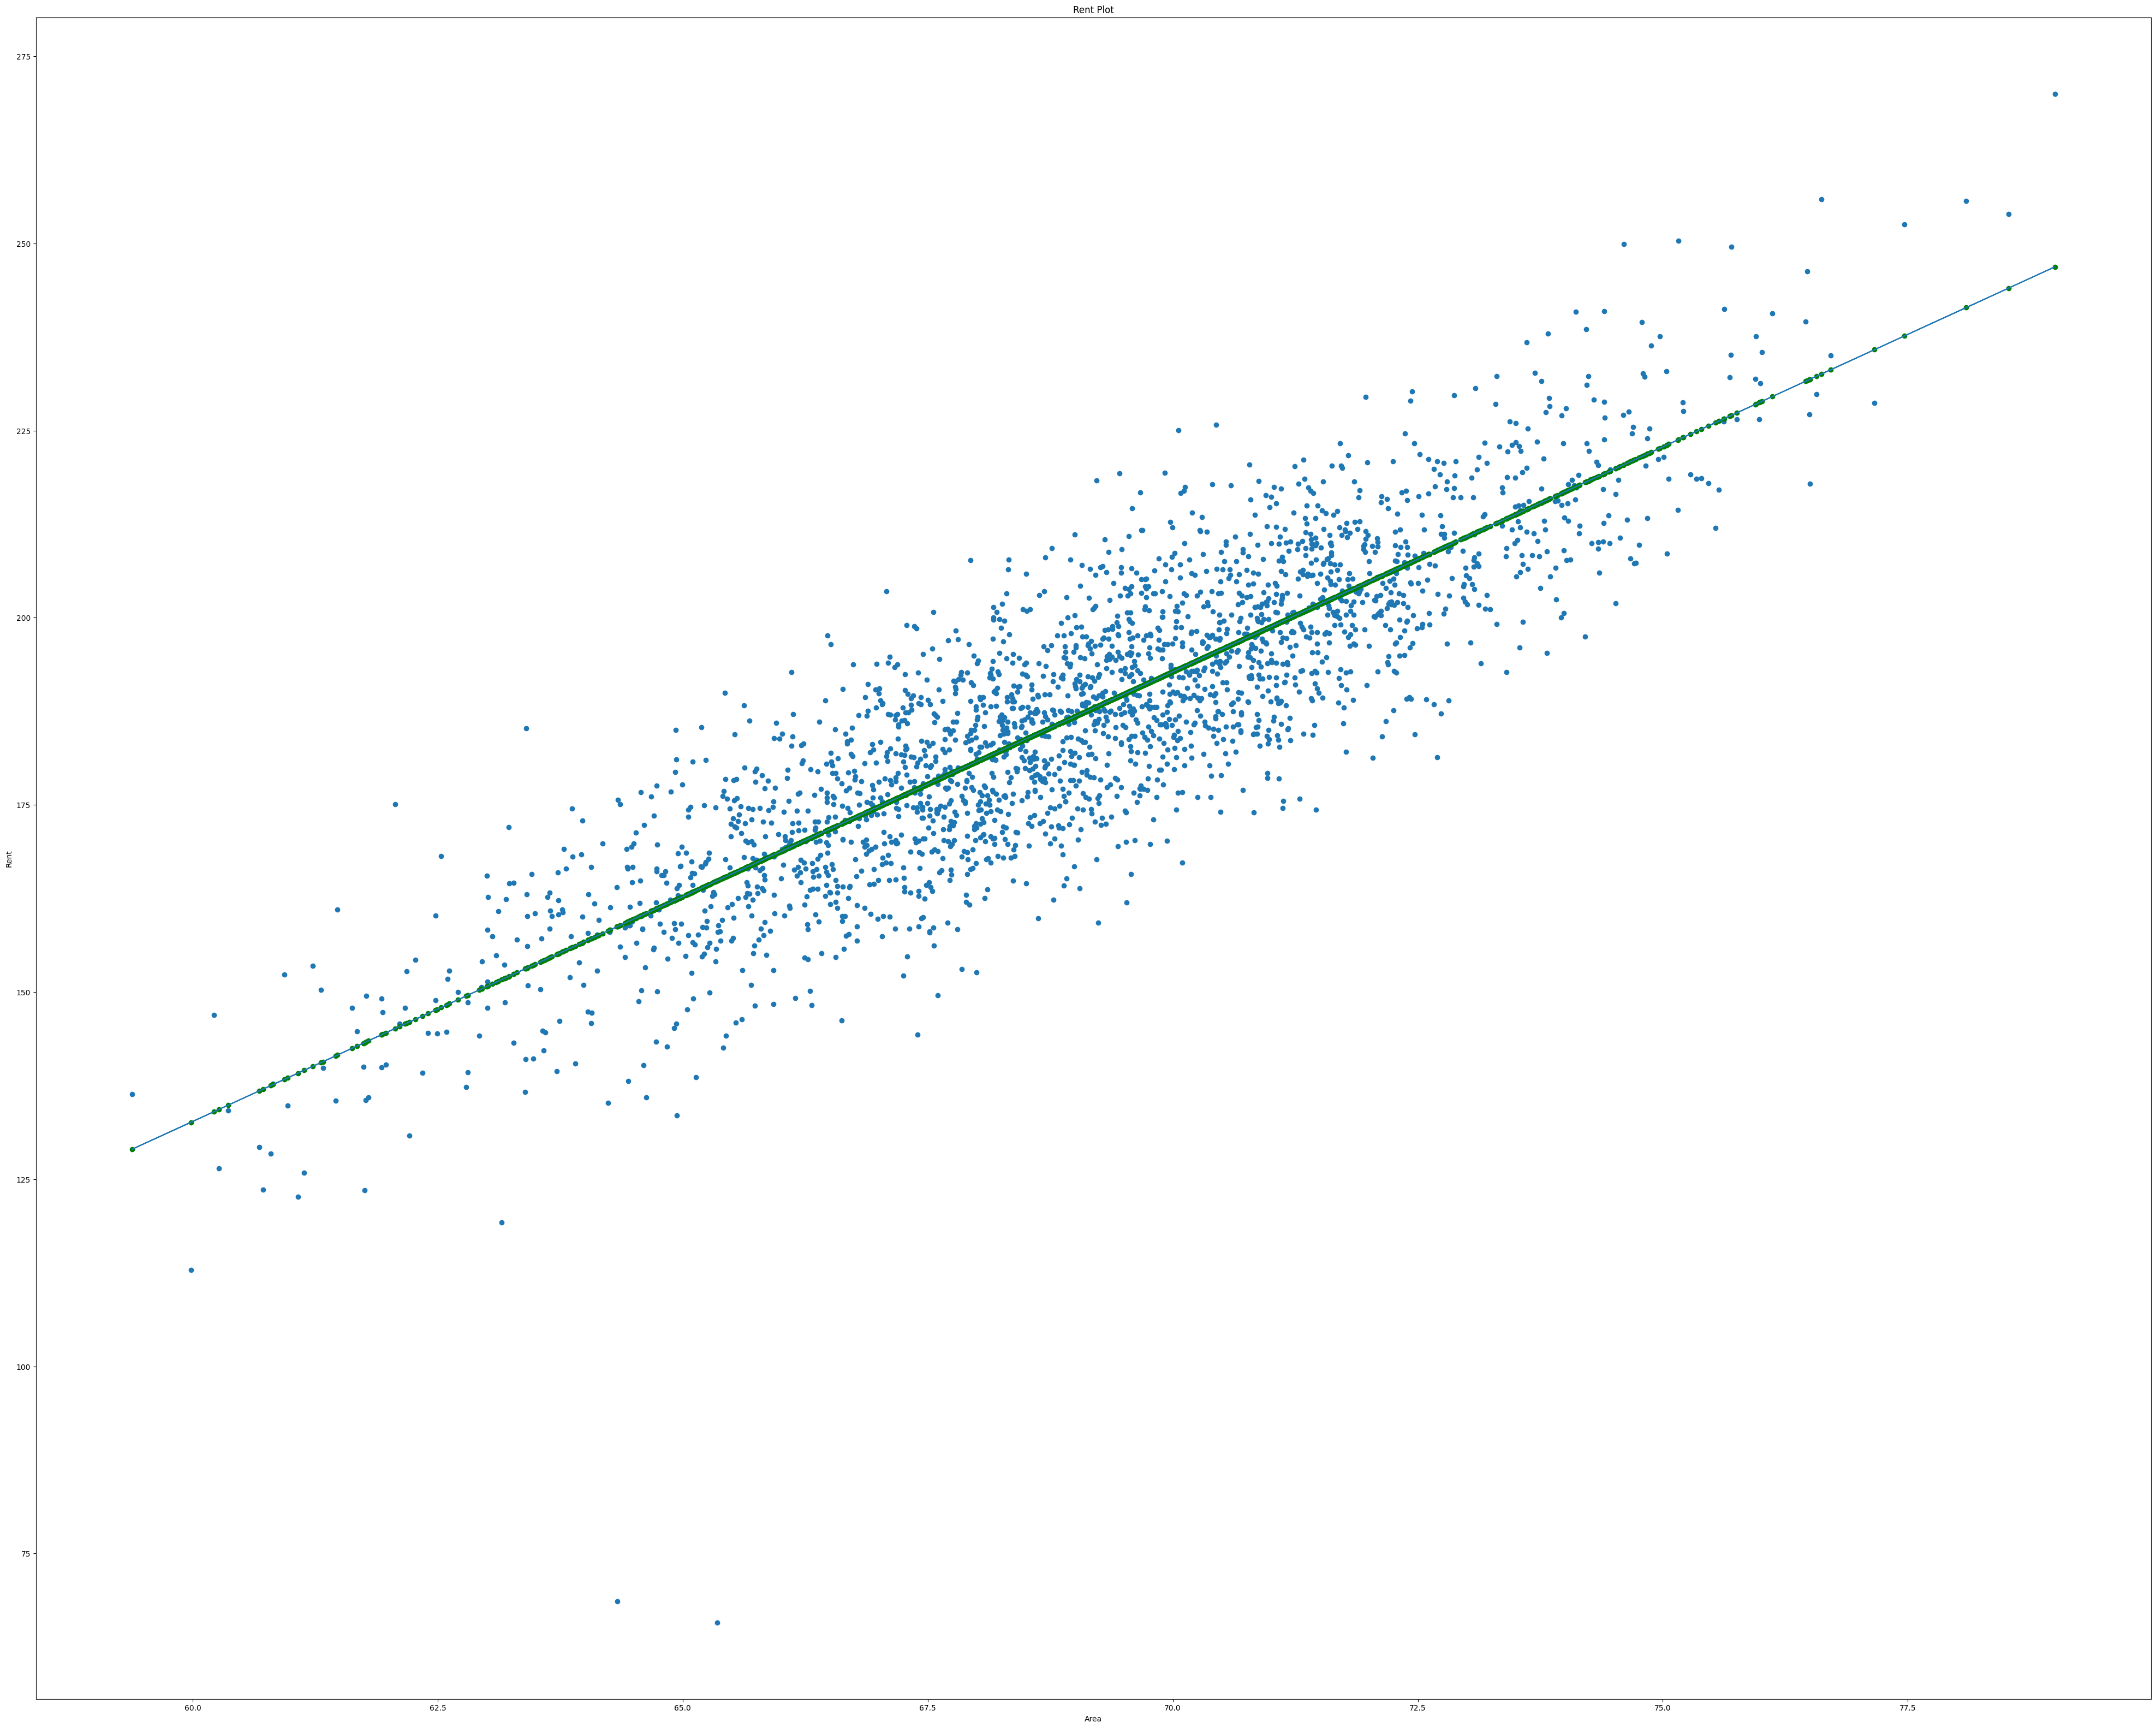

In [ ]:
plt.figure(figsize=(50,40))
plt.xlabel("Area")
plt.ylabel("Rent")
plt.title("Rent Plot")
plt.scatter(xtrain,ytrain)
plt.plot(xtrain,reg.predict(xtrain))
plt.scatter(xtrain,reg.predict(xtrain),color="green")

In [ ]:
from sklearn.metrics import r2_score
r2_score(ytest,pred)

0.7302328605746943

save model

In [ ]:
import pickle as pk
import joblib as jb

In [ ]:
pk.dump(reg,open("first","wb"))

In [ ]:
reg2 = pk.load(open("first","rb"))

In [ ]:
reg2.predict([[2000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11788.42261415])

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
jb.dump(reg, "second")

['second']